In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stat
from matplotlib import pyplot as plt

##Calculating a Distribution for the Inverse Coupon Collector's Problem With Non-Uniform Coupon Probabilities
To find results for the InverseCCP via simulation, we actually need to simulate the regular CCP with non-uniform probabilities and logging the results.  By "transposing" the results into a lookup table, we will see the results for the InverseCCP.  We can't simulate an InverseCCP directly because we don't know how.

###Generating Uniform Probabilities
The probability of collecting a coupon from a collection of $n$ coupons where all coupons have the same uniform probabilitiy is just $\frac{1}{n}$.  There is little ambiguity about what that means and it is easily interpreted and understood how this probability is generated.  But how does this translate to a non-uniform probability distribution such as a normal distribution?

###Generating Normal Probabilities
To create a simulation of the coupon collector's problem with non-uniform probabilities, we must first agree on how to generate non-uniform probabilities. If I say that I have a coupon collector's problem where the probabilities obey a normal distribution, what does that really mean?  Intuitively, I think that means that most coupons have a similar probability of collection, while a few have a much lower than normal probability of collection, and a few others have a much higher probability of collection.  But I struggle with what that actually means with an inherently finite problem.  Normal distributions have non-zero probabilities on the open interval ($-\infty$ to $+\infty$), but we only have a finite number of coupons.  Also, normal distributions are continuous, and we only allow integers as inputs to our probability function.  How do we deal with this?  I really think that normal distributions are the most applicable to the coupon collector's problem aside from the uniform distribution, but I can't move forward until we formalize what is intuitively understood.  Also, the answers we come up with for normal distributions will likely translate to other distributions that are popular but not discrete such as exponential distributions.

##Option 1: Binomial Approximation
One way is to generate a binomial approximation (with $p=0.5$) of the normal distribution.  This has the advantage of already being computed, and there is an $n$ embedded in the calculations so the total coupon probabilties will sum to 1 (a requirement since we assume that there is no option to collect something outside of the set of $n$ coupons).  The downside is that this doesn't actually translate well to other distributions and there is no way to adjust the standard deviation like you can with a true normal distribution (changing $p$ shifts the centrality of the distribution along with the standard deviation).  It also doesn't make as much sense because the binomial distribution already has a well defined definition (the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability p) that doesn't really mesh with how we are thinking of this problem.  Anyway, an example application of this option would look like this with $n=20$ coupons.  This is actually generated with a percent point function (quantile function), and then scaled to make everything sum to 1 (this contradicts one of my earlier statements about the "advantage" of this method, but it works).  This makes something that fits with my intuition of "normal."  Most coupons have a probability between 0.04 and 0.06, with a few above or below that range.

mean prob = 0.0500000000000000 , sum of all probs = 1.0000000000000000


[0, 20, 0, 0.1]

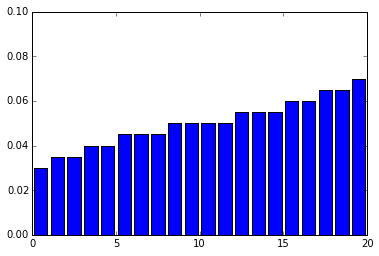

In [2]:
n = 20 #number of coupons
p = 0.5 #this is to make the distribution central, where most coupons are middle of the road probabilities
x = np.arange(n)+0.5 #arange goes from 0 to n-1, and I want it to go from 1 to n
p_x = stat.binom.ppf(x/n, n, p) # ouptputs whole numbers because it's a discrete distribution
p_x = p_x/np.sum(p_x) # change whole numbers into 
print('mean prob = %1.16f' % np.mean(p_x), ', sum of all probs = %1.16f' % np.sum(p_x) )
plt.bar(x, p_x, align='center')
plt.axis([0,n,0,2/n])

##Option 2: Normal Distribution
After playing with the ppf of the last example, I think I know how to find a consistent way to create coupon probabilites that intuitively fits a normal distribution.  Look at the notebook for GenerateProbsPart2 for this option.